In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pwd

In [2]:
path = './chefboost-master/tests/dataset/adaboost.txt'

In [3]:
df = pd.read_csv(path)
df.head()

,x1,x2,Decision
0,2.0,3.0,1
1,2.1,2.0,1
2,4.5,6.0,1
3,4.0,3.5,-1
4,3.5,1.0,-1


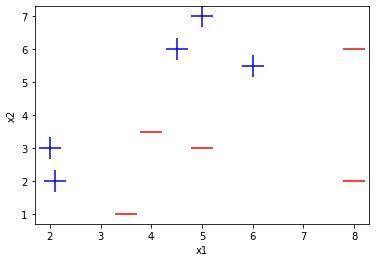

In [4]:
positives = df[df['Decision'] >= 0]
negatives = df[df['Decision'] < 0]
plt.scatter(positives['x1'],positives['x2'], marker='+',s=500, c='blue')
plt.scatter(negatives['x1'],negatives['x2'], marker='_',s=500, c='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [6]:
from chefboost import Chefboost as chef
#!pip install chefboost

In [7]:
config = {'enableAdaboost':True, 'num_of_weak_classifier':4}

In [8]:
model = chef.fit(df,config)

Adaboosting:   0%|                                                                               | 0/4 [00:00<?, ?it/s]

That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...


Epoch 4. Loss: 0. Process: : 100%|███████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.65it/s]

The best epoch is  3  with the  0.0  MAE score
-------------------------
finished in  0.8704991340637207  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  10  instances
Labels:  ['1' '-1']
Confusion matrix:  [[5, 0], [0, 5]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [11]:
import math

In [13]:
import numpy as np

In [15]:
np.log(2.71)

0.9969486348916096

In [16]:
math.log(2.71)

0.9969486348916096

In [17]:
np.log(2.71) == math.log(2.71)

True

In [21]:
np.log ([2.71,5.42])

array([0.99694863, 1.69009582])

In [26]:
err = 1/5
alpha = 0.5*math.log((1-err)/err)
print(alpha)

0.6931471805599453


In [28]:
1/2*math.log((1-err)/err)

0.6931471805599453

In [31]:
A = np.array([[0,0,1],[1,0,0],[0,1,0]])

In [33]:
A.shape

(3, 3)

In [38]:
Pie = np.array([[1],[0],[0]])

In [43]:
Pie = np.array([1,0,0])

In [44]:
Pie.shape

(3,)

In [46]:
C = np.dot(A,Pie)

In [47]:
print(C)
print(C.shape)

[0 1 0]
(3,)


In [42]:
print(A.shape)
print(Pie.shape)

(3, 3)
(3, 1)


In [ ]:
D = np.matmul(A,Pie)
print(D)
print(D.shape)

### PCA

In [49]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import scipy.linalg as la
from sklearn.decomposition import PCA

'''
Data
'''
data = np.matrix([[1,2,4],
               [4,1,2],
               [5,4,8]])

df = pd.DataFrame(data)



In [50]:
df

,0,1,2
0,1,2,4
1,4,1,2
2,5,4,8


In [51]:
'''
Manual calculation
'''

# standardize data 
standardized_data  = (df - df.mean()) / (df.std())

standardized_data

,0,1,2
0,-1.120897,-0.218218,-0.218218
1,0.320256,-0.872872,-0.872872
2,0.800641,1.091089,1.091089


In [52]:
# Finding covariance
print('Finding covariance')
covarance = np.cov(standardized_data.T, bias = 1)

covarance

Finding covariance


array([[0.66666667, 0.27954262, 0.27954262],
       [0.27954262, 0.66666667, 0.66666667],
       [0.27954262, 0.66666667, 0.66666667]])

In [54]:
# find eigen value& eigen vector
print('find eigen value& eigen vector')
eigenvalue, eigenvectors = np.linalg.eig(covarance)

print('eigenvalue = ',eigenvalue)
print()
print('eigenvectors = ',eigenvectors)


find eigen value& eigen vector
eigenvalue =  [ 1.51710663e+00  4.82893369e-01 -7.55515553e-35]

eigenvectors =  [[ 4.21537439e-01  9.06810999e-01  4.63797517e-17]
 [ 6.41212207e-01 -2.98071982e-01 -7.07106781e-01]
 [ 6.41212207e-01 -2.98071982e-01  7.07106781e-01]]


In [55]:
# Find PCA
print('Find PCA')
n_components = 3

pca_manual = np.matmul(np.array(standardized_data),eigenvectors)

pca_manual  = pca_manual[:,:n_components]

print('pca_manual: ',pca_manual)


Find PCA
pca_manual:  [[-7.52348033e-01 -8.86352520e-01 -8.32667268e-17]
 [-9.84391775e-01  8.10769054e-01 -1.11022302e-16]
 [ 1.73673981e+00  7.55834658e-02  2.22044605e-16]]


In [58]:
len(pca_manual[0])*len(pca_manual)

9

In [59]:
'''
calculate using SKlearn
'''

# PCA
print('PCA')
pca_sklearn = (PCA(n_components).fit_transform(standardized_data))
print('pca_sklearn =',pca_sklearn)


PCA
pca_sklearn = [[-7.52348033e-01  8.86352520e-01  3.10894964e-17]
 [-9.84391775e-01 -8.10769054e-01  3.10894964e-17]
 [ 1.73673981e+00 -7.55834658e-02  3.10894964e-17]]


In [60]:
print('Standardized data')
print(standardized_data.round(2))
print('')



Standardized data
      0     1     2
0 -1.12 -0.22 -0.22
1  0.32 -0.87 -0.87
2  0.80  1.09  1.09



In [61]:
print('Covariance')
print(covarance.round(2))
print('')

Covariance
[[0.67 0.28 0.28]
 [0.28 0.67 0.67]
 [0.28 0.67 0.67]]



In [62]:
print('eigen_value')
print(eigenvalue.round(4))
print('')

eigen_value
[ 1.5171  0.4829 -0.    ]



In [63]:
print('eigen_vector')
print(eigenvectors.round(4))
print('')

eigen_vector
[[ 0.4215  0.9068  0.    ]
 [ 0.6412 -0.2981 -0.7071]
 [ 0.6412 -0.2981  0.7071]]



In [64]:
print('PCA manually calculated')
print(pca_manual.round(2))
print('')

PCA manually calculated
[[-0.75 -0.89 -0.  ]
 [-0.98  0.81 -0.  ]
 [ 1.74  0.08  0.  ]]



In [65]:
print('PCA - sklearn')
print(pca_sklearn.round(2))

PCA - sklearn
[[-0.75  0.89  0.  ]
 [-0.98 -0.81  0.  ]
 [ 1.74 -0.08  0.  ]]


## FA

In [66]:
#Explanatry

import pandas as pd
import numpy as np

import sklearn
from sklearn.decomposition import FactorAnalysis

from sklearn import datasets


In [68]:
#loading iris
iris = datasets.load_iris()

In [70]:
X = iris.data
variable_names = iris.feature_names

In [71]:
X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [73]:
factor = FactorAnalysis().fit(X)


In [74]:
factor

FactorAnalysis()

In [75]:
pd.DataFrame(factor.components_, columns = variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


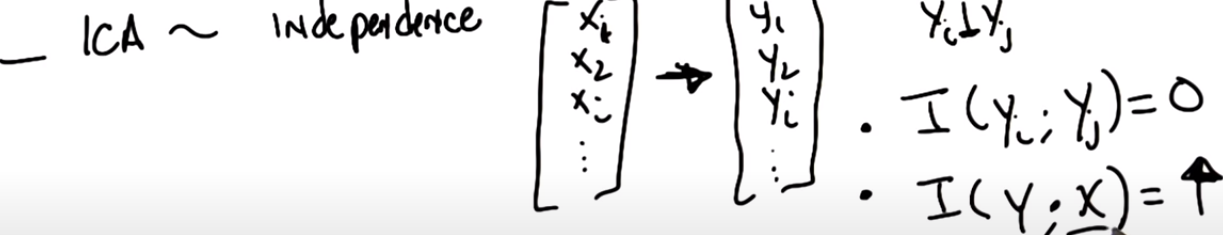

In [76]:
pwd

'G:\\DLCV_Practice'

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
path = './chefboost-master/tests/dataset/ujian_no_1.txt'
df = pd.read_csv(path)
print(df)

    x1   x2  Decision
0  1.0  2.0         1
1  2.0  1.5         1
2  1.5  1.0         1
3  1.0  1.0        -1
4  2.0  1.0        -1


In [85]:
df

,x1,x2,Decision
0,1.0,2.0,1
1,2.0,1.5,1
2,1.5,1.0,1
3,1.0,1.0,-1
4,2.0,1.0,-1


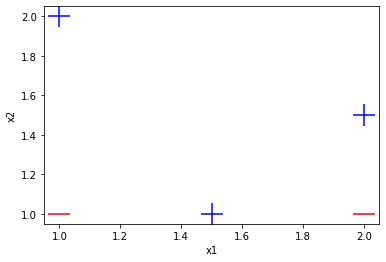

In [86]:
positives = df[df['Decision'] >= 0]
negatives = df[df['Decision'] < 0]
plt.scatter(positives['x1'],positives['x2'], marker='+',s=500, c='blue')
plt.scatter(negatives['x1'],negatives['x2'], marker='_',s=500, c='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [87]:
config = {'enableAdaboost':True, 'num_of_weak_classifier':4}
model = chef.fit(df,config)

Adaboosting:   0%|                                                                               | 0/4 [00:00<?, ?it/s]

That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...


Epoch 4. Loss: 0. Process: : 100%|███████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.18it/s]

The best epoch is  0  with the  0.2  MAE score
-------------------------
finished in  0.9637227058410645  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  80.0 % on  5  instances
Labels:  ['1' '-1']
Confusion matrix:  [[2, 0], [1, 2]]
Precision:  100.0 %, Recall:  66.6667 %, F1:  80.0 %


In [89]:
math.log(2.71)

0.9969486348916096

In [90]:
err = 0.4
0.5*math.log((1-err)/err)

0.2027325540540821